In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


 ***LOADING DATASET***

In [60]:
df= pd.read_csv("/kaggle/input/titanic/train.csv")

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


calcul statistique

In [63]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***PLOTTING SOME FEATURES***

<AxesSubplot:>

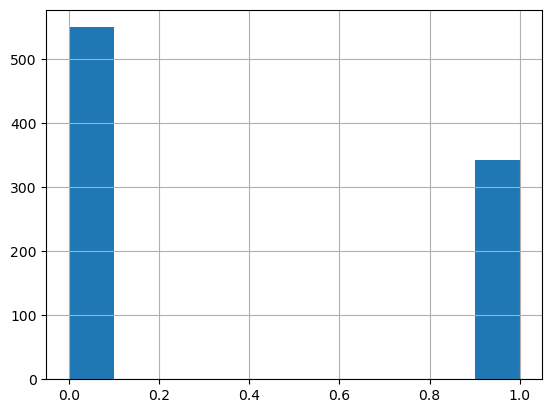

In [64]:
df['Survived'].hist()
#histogramme de la variable survived

***showing columns and their types***

In [65]:
df.columns
#columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
df.dtypes
#les types de chaque variable
#object==string

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

***null values in featues***

In [67]:
df['Embarked'].isnull().sum()
#la somme des valurs nulles d'une variable

2

In [68]:
#afficher les valeurs nulles de chaque variables du dataset
columns_names= df.columns
for column in columns_names:
    print(column+'  '+str(df[column].isnull().sum()))

PassengerId  0
Survived  0
Pclass  0
Name  0
Sex  0
Age  177
SibSp  0
Parch  0
Ticket  0
Fare  0
Cabin  687
Embarked  2


In [69]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

***EXPLORING DATA***

In [70]:
df.Survived.value_counts()
#chaque classe contient combien de valeurs

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'survivial probability')

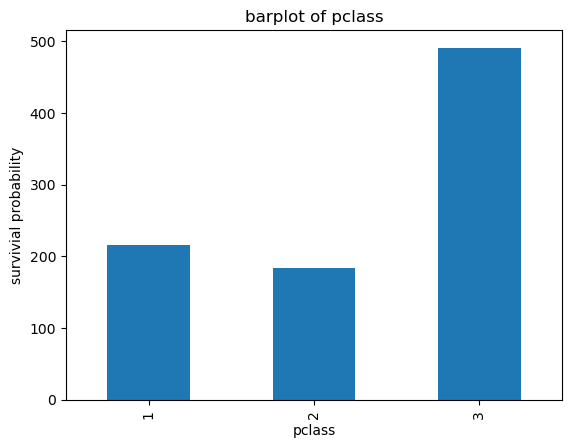

In [71]:
plt= df.Pclass.value_counts().sort_index().plot(kind='bar',title='barplot of pclass')
plt.set_xlabel('pclass')
plt.set_ylabel('survivial probability')

In [72]:
df[['Pclass','Survived']].groupby('Pclass').count()
#nbr de passager de chaque classe

,Survived
Pclass,
1,216
2,184
3,491


In [73]:
df[['Pclass','Survived']].groupby('Pclass').sum()
#somme des survived

,Survived
Pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survived')

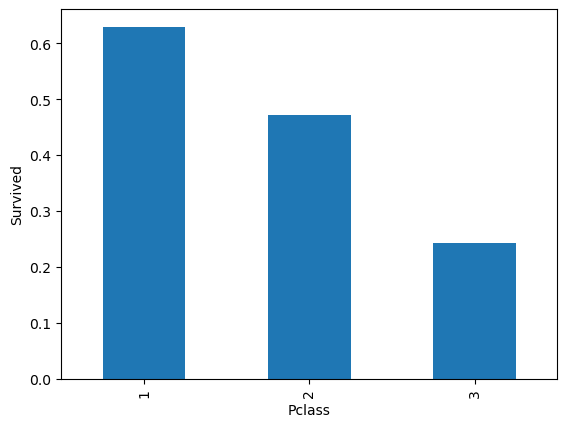

In [74]:
plt= df[['Pclass','Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survived')

In [75]:
df[['Sex','Survived']].groupby('Sex').count()


,Survived
Sex,
female,314
male,577


In [76]:
df[['Sex','Survived']].groupby('Sex').sum()


,Survived
Sex,
female,233
male,109


Text(0, 0.5, 'Survived')

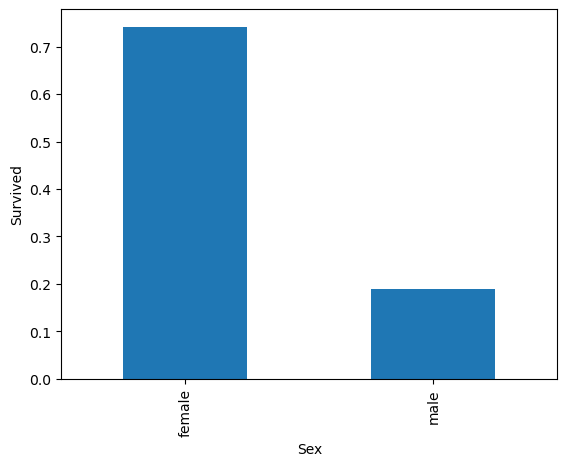

In [77]:
plt= df[['Sex','Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survived')

***FILL NULL VALUES***

In [78]:
df['Age'].mean()



29.69911764705882

In [79]:
df['Age'].min()


0.42

In [80]:
df['Age'].max()

80.0

In [81]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [82]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [83]:
df['Embarked'].fillna('S',inplace=True)

In [84]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [85]:
columns_names= df.columns
for column in columns_names:
    print(column+'  '+str(df[column].isnull().sum()))

PassengerId  0
Survived  0
Pclass  0
Name  0
Sex  0
Age  0
SibSp  0
Parch  0
Ticket  0
Fare  0
Cabin  687
Embarked  0


*CABIN HAS 687 NULL VALUES SO LET'S DROP IT*

In [86]:
#supprimer des colonnes
df= df.drop(columns=['Ticket','Cabin','PassengerId'])

In [87]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


***ENCODING CATEGORICAL DATA***

In [88]:
#encodege des variables pour pouvoir appliquer l'algorithme
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})

In [89]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [90]:
df['Title']= df.Name.str.extract('([A-Za-z]+)\.', expand=False)
df= df.drop(columns=['Name'])

***Feature engineering***

In [91]:
df['Familysize']= df['SibSp']+ df['Parch']+ 1
#is it a family of passengers or only one person

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,0,3,0,22.0,1,0,7.2500,2,Mr,2
1,1,1,1,38.0,1,0,71.2833,0,Mrs,2
2,1,3,1,26.0,0,0,7.9250,2,Miss,1
3,1,1,1,35.0,1,0,53.1000,2,Mrs,2
4,0,3,0,35.0,0,0,8.0500,2,Mr,1


In [93]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [94]:
df['Title'] = df['Title'].replace([ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'],'Others')

In [95]:
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
df['Title'] = df['Title'].replace('Mlle','Miss')

In [96]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,0,3,0,22.0,1,0,7.2500,2,Mr,2
1,1,1,1,38.0,1,0,71.2833,0,Mrs,2
2,1,3,1,26.0,0,0,7.9250,2,Miss,1
3,1,1,1,35.0,1,0,53.1000,2,Mrs,2
4,0,3,0,35.0,0,0,8.0500,2,Mr,1


In [97]:
df['Title']=df['Title'].map({'Mr':2,'Mrs':3,'Miss':1,'Master':0,'Others':4})

In [98]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,0,3,0,22.0,1,0,7.2500,2,2,2
1,1,1,1,38.0,1,0,71.2833,0,3,2
2,1,3,1,26.0,0,0,7.9250,2,1,1
3,1,1,1,35.0,1,0,53.1000,2,3,2
4,0,3,0,35.0,0,0,8.0500,2,2,1


**#modélisation** 


In [99]:
from sklearn.model_selection import train_test_split

x=df.drop("Survived",axis=1)
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [100]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

***LINEAR REGRESSION MODEL***

In [101]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train , y_train)

LinearRegression()

In [102]:
Pred = LR.predict(x_test)

In [103]:
Pred

array([ 0.27417624, -0.09493651,  0.33109948,  0.5769068 ,  0.09304692,
        0.80528315,  0.13632167,  0.4370264 ,  0.13693758,  0.0638414 ,
        0.39386559, -0.01330996,  0.25517766,  0.53002672,  0.27417624,
        0.22338469,  0.70512371,  0.50315996,  0.10207077,  0.51079972,
        0.07478596, -0.03461369,  0.1142125 ,  0.5246788 ,  0.03108296,
        0.95263463,  0.46046665,  0.15138686,  0.95726525,  0.092612  ,
        0.47426789,  0.43492951,  0.32244559,  0.86967666,  0.08572717,
        0.58639009,  0.82465725,  0.60300663,  0.0803846 ,  0.21899665,
        0.68577146,  0.41543348,  0.70781732,  0.44714552,  0.16723511,
        0.11420611,  0.8460491 ,  0.07643197,  0.08732905,  0.94394547,
        0.5106401 ,  0.06384711,  0.60458531,  0.10207077,  0.1020869 ,
        0.09119777,  0.1506792 ,  0.04744538,  0.2543139 ,  0.1940685 ,
        0.06776433,  0.71258321,  0.12402376,  0.78159826,  0.24567036,
        0.62313473,  0.84507135,  0.08035154,  0.0769646 , -0.19

In [104]:
#round to the nearest integer
Pred =Pred.round()
Pred

array([ 0., -0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  0., -0.,  0.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0., -0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
       -0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1., -0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.])

In [105]:
from sklearn.metrics import accuracy_score

accuracy_score(Pred , y_test)

0.7877094972067039

In [119]:
from sklearn.metrics import f1_score
f1_score(Pred,y_test)

0.4259259259259259

***DESICION TREE CLASSIFIER***

In [120]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train , y_train)


DecisionTreeClassifier()

In [121]:
Pred = DT.predict(x_test)

In [122]:
from sklearn.metrics import accuracy_score

accuracy_score(Pred , y_test)

0.7430167597765364

In [123]:
from sklearn.metrics import f1_score

f1_score(Pred , y_test)

0.6567164179104478

***KNeighborsClassifier***

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [125]:
Pred = knn.predict(x_test)

In [126]:
Pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0])

In [127]:
from sklearn.metrics import accuracy_score

accuracy_score(Pred , y_test)

0.6536312849162011

In [128]:
from sklearn.metrics import f1_score

f1_score(Pred , y_test)

0.4259259259259259

***HYPERPARAMETERS FOR BEST PERFORMANCE***

In [129]:
DT.get_params 

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [130]:
dict_param = { 'criterion' : ['gini', 'entropy'], 'max_depth' : [4,5,6]}

In [131]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DT , dict_param , cv=5)

clf.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6]})

In [132]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [133]:
DT = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)
DT.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [134]:
pred = DT.predict(x_test)
f1_score(pred ,y_test)

0.625

***CROSS VALIDATION***

**##decisiontree**

In [135]:
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() #scale the input features X to the range [0, 1]
x_scaled = scaler.fit_transform(x)

In [136]:
skf = StratifiedKFold(n_splits=5 , shuffle=False)
list_scor = [] #to store the f1 score obtained for each fold.

for train_index , test_index in skf.split(x,y):
    x_train_fold , x_test_fold = x_scaled[train_index] , x_scaled[test_index]
    y_train_fold , y_test_fold = y[train_index] , y[test_index]

    DT.fit(x_train_fold , y_train_fold)
    pred = DT.predict(x_test_fold)
    list_scor.append(f1_score(pred , y_test_fold))

In [137]:
np.mean(list_scor)


0.7507910112158426

***#random forest***

In [138]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

In [140]:
skf = StratifiedKFold(n_splits=5 , shuffle=False)
list_scor = [] 

for train_index , test_index in skf.split(x,y):
    x_train_fold , x_test_fold = x_scaled[train_index] , x_scaled[test_index]
    y_train_fold , y_test_fold = y[train_index] , y[test_index]

    RF.fit(x_train_fold , y_train_fold)
    pred = RF.predict(x_test_fold)
    list_scor.append(f1_score(pred , y_test_fold))

In [141]:
np.mean(list_scor)

0.7439438238926843

***#adaboost***

In [142]:
from sklearn.ensemble import AdaBoostClassifier

AB = AdaBoostClassifier()

In [144]:
skf = StratifiedKFold(n_splits=5 , shuffle=False)
list_scor = [] 

for train_index , test_index in skf.split(x,y):
    x_train_fold , x_test_fold = x_scaled[train_index] , x_scaled[test_index]
    y_train_fold , y_test_fold = y[train_index] , y[test_index]

    AB.fit(x_train_fold , y_train_fold)
    pred = AB.predict(x_test_fold)
    list_scor.append(f1_score(pred , y_test_fold))

In [145]:
np.mean(list_scor)

0.7666357572945091

***#xgboost***

In [146]:
from xgboost import XGBClassifier
xb = XGBClassifier()

In [147]:
skf = StratifiedKFold(n_splits=5 , shuffle=False)
list_scor = [] 

for train_index , test_index in skf.split(x,y):
    x_train_fold , x_test_fold = x_scaled[train_index] , x_scaled[test_index]
    y_train_fold , y_test_fold = y[train_index] , y[test_index]

    xb.fit(x_train_fold , y_train_fold)
    pred = xb.predict(x_test_fold)
    list_scor.append(f1_score(pred , y_test_fold))

In [148]:
np.mean(list_scor)

0.7555859473957403